拟合: ΔS = k·Δt' + b
  k = 6.821557e+05 m/s
  b = -5.113889e-03 m
  R^2 = 0.999838
计算得到 c = 2.968476e+08 m/s


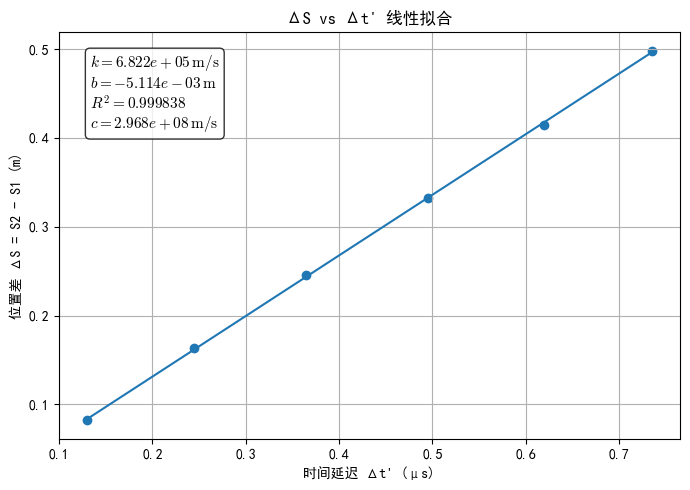

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'cm'  # 使用 Computer Modern 字体渲染数学公式

# 常数
nu  = 100e6       # Hz
nu_p = 459.6e3    # Hz

# 数据（来自你的表）
S1 = 0.0184
S2 = np.array([0.1005, 0.1815, 0.2645, 0.3504, 0.4333, 0.5163])
dt = np.array([0.130e-6,0.245e-6,0.365e-6,0.495e-6,0.620e-6,0.735e-6])

# 计算 ΔS
dS = S2 - S1

# 线性拟合 ΔS vs Δt'
slope, intercept, r_value, p_value, std_err = stats.linregress(dt, dS)

# 由理论关系计算光速
k = slope
c = 2 * k * (nu / nu_p)

print(f"拟合: ΔS = k·Δt' + b")
print(f"  k = {k:.6e} m/s")
print(f"  b = {intercept:.6e} m")
print(f"  R^2 = {r_value**2:.6f}")
print(f"计算得到 c = {c:.6e} m/s")

# 绘图（横轴用 μs 更直观）
plt.figure(figsize=(7,5))
plt.scatter(dt*1e6, dS)
x_line = np.linspace(dt.min(), dt.max(), 200)
plt.plot(x_line*1e6, slope*x_line + intercept)
plt.xlabel("时间延迟 Δt' (μs)")
plt.ylabel("位置差 ΔS = S2 - S1 (m)")
plt.title("ΔS vs Δt' 线性拟合")
plt.grid(True)

# =========================
# 4. 在图上输出拟合信息
# =========================
textstr = '\n'.join((
    r'$k = %.3e\,\mathrm{m/s}$' % k,
    r'$b = %.3e\,\mathrm{m}$' % intercept,
    r'$R^2 = %.6f$' % (r_value**2),
    r'$c = %.3e\,\mathrm{m/s}$' % c
))
# 在图中添加文本框（右上角）
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
